<a href="https://colab.research.google.com/github/kimiafa/Network/blob/main/wireless-modulation-simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" style="text-align: right;">

# پیاده‌سازی مقاله: مقایسه عملکرد BPSK و QPSK در کانال AWGN


https://arxiv.org/pdf/2103.03970


در این نوت‌بوک، بخشی از یک مقاله در حوزه شبکه‌های مخابراتی
پیاده‌سازی شده است که به بررسی عملکرد مدولاسیون‌های دیجیتال
BPSK و QPSK در کانال نویزی AWGN می‌پردازد.

معیار ارزیابی عملکرد، نرخ خطای بیت (Bit Error Rate - BER) است
که یکی از مهم‌ترین شاخص‌ها در سیستم‌های مخابراتی محسوب می‌شود.
</div>

<div dir="rtl" style="text-align: right;">

## مفاهیم پایه

- **BPSK**: مدولاسیون فاز دودویی که هر بیت را با یک فاز نمایش می‌دهد.
- **QPSK**: مدولاسیونی که در هر سمبل دو بیت ارسال می‌کند.
- **AWGN**: کانالی شامل نویز سفید گاوسی که مدل استاندارد نویز در مخابرات است.
- **BER**: نسبت تعداد بیت‌های اشتباه به کل بیت‌های ارسال‌شده.
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def bpsk_mod(data):
    # تبدیل 0 → -1 و 1 → +1
    return 2*data - 1

def bpsk_demod(received):
    # تصمیم‌گیری بر اساس علامت سیگنال
    return (received > 0).astype(int)


In [3]:
def qpsk_mod(data):
    data = data.reshape(-1, 2)
    return (2*data[:,0]-1) + 1j*(2*data[:,1]-1)

def qpsk_demod(received):
    bits = []
    for r in received:
        bits.append(1 if np.real(r) > 0 else 0)
        bits.append(1 if np.imag(r) > 0 else 0)
    return np.array(bits)


In [4]:
def awgn(signal, snr_db):
    snr_linear = 10**(snr_db/10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_variance = signal_power / snr_linear

    noise = np.sqrt(noise_variance/2) * (
        np.random.randn(len(signal)) + 1j*np.random.randn(len(signal))
    )
    return signal + noise


In [5]:
N = 10000
snr_range = range(0, 11)

ber_bpsk = []
ber_qpsk = []

for snr in snr_range:
    data = np.random.randint(0, 2, N)

    # BPSK
    tx_bpsk = bpsk_mod(data)
    rx_bpsk = awgn(tx_bpsk, snr)
    dec_bpsk = bpsk_demod(np.real(rx_bpsk))
    ber_bpsk.append(np.mean(dec_bpsk != data))

    # QPSK
    data_qpsk = data[:N - N % 2]
    tx_qpsk = qpsk_mod(data_qpsk)
    rx_qpsk = awgn(tx_qpsk, snr)
    dec_qpsk = qpsk_demod(rx_qpsk)
    ber_qpsk.append(np.mean(dec_qpsk != data_qpsk))


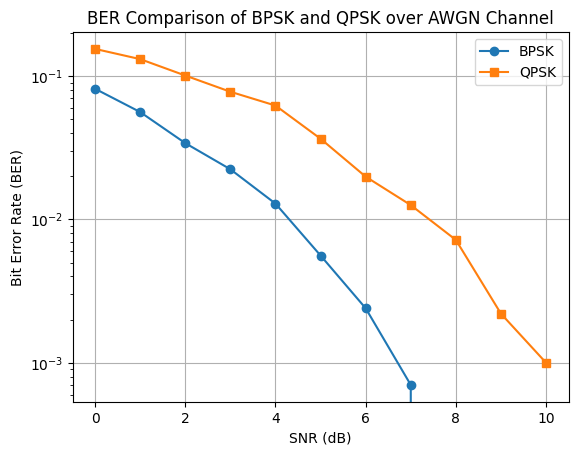

In [6]:
plt.semilogy(snr_range, ber_bpsk, 'o-', label='BPSK')
plt.semilogy(snr_range, ber_qpsk, 's-', label='QPSK')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER Comparison of BPSK and QPSK over AWGN Channel")
plt.grid(True)
plt.legend()
plt.show()



<div dir="rtl" style="text-align: right;">
## تحلیل نتایج

نتایج شبیه‌سازی نشان می‌دهد که با افزایش SNR،
نرخ خطای بیت برای هر دو مدولاسیون کاهش می‌یابد.

همچنین مشاهده می‌شود که BPSK در مقایسه با QPSK
در شرایط نویزی عملکرد بهتری دارد، زیرا فاصله سیگنال‌ها
در فضای سیگنال بیشتر است.
</div>



<div dir="rtl" style="text-align: right;">
# نتیجه‌گیری

در این نوت‌بوک، عملکرد دو مدولاسیون پرکاربرد BPSK و QPSK
در کانال نویزی AWGN بررسی شد. نتایج به‌دست‌آمده
با تحلیل‌های ارائه‌شده در مقالات شبکه‌های مخابراتی
هم‌خوانی دارد و اهمیت انتخاب مدولاسیون مناسب
در طراحی سیستم‌های مخابراتی را نشان می‌دهد.
</div>





<div dir="rtl" style="text-align: right;">
## مقاله

</div>


https://arxiv.org/pdf/2103.03970